# PaddleOCR 예제 (Jupyter Notebook)
이미지에서 텍스트를 추출하고 시각화하는 기본적인 예제입니다.

1. 설치: PaddleOCR + CPU용 PaddlePaddle
2. 언어: 영어 (lang='en'), 한국어는 lang='ko'로 변경
3. 입력: 이미지 파일
4. 출력: 텍스트 및 시각화 이미지

In [1]:
# 설치 (CPU용)
#!pip install paddleocr
#!pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple
#!pip install matplotlib

In [2]:
# 라이브러리 임포트
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
import matplotlib.pyplot as plt
import pprint

/home/nsh/anaconda3/envs/CapDes/lib/python3.10/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


In [3]:
# OCR 모델 생성 (lang='ko'로 바꾸면 한국어 인식 가능)
ocr = PaddleOCR(use_angle_cls=True, lang='en')

[2025/05/19 14:16:43] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/nsh/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/nsh/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, ma

In [4]:
# 이미지 경로 설정
image_path = '../docs/dummy_1.png'  # 여기에 이미지 경로를 입력하세요

In [5]:
# OCR 수행
result = ocr.ocr(image_path, cls=True)

# 텍스트 출력
for line in result:
    for box, (text, confidence) in line:
        print(f'Text: {text}, Confidence: {confidence:.2f}')

[2025/05/19 14:16:44] ppocr DEBUG: dt_boxes num : 19, elapsed : 0.18667364120483398
[2025/05/19 14:16:44] ppocr DEBUG: cls num  : 19, elapsed : 0.06934213638305664
[2025/05/19 14:16:45] ppocr DEBUG: rec_res num  : 19, elapsed : 1.501237154006958
Text: Thesis, Confidence: 1.00
Text: Iypes:, Confidence: 0.94
Text: ["THEE-sis."], Confidence: 0.97
Text: . Expository Thesis, Confidence: 0.96
Text: A thesis is a statement or theory put, Confidence: 0.99
Text: . Analytical Thesis, Confidence: 0.96
Text: forward to be proved or maintained., Confidence: 1.00
Text: . Argumentative Thesis, Confidence: 0.97
Text: typically in academic writing, Confidence: 0.98
Text: . Narrative Thesis, Confidence: 0.96
Text: . Descriptive Thesis, Confidence: 0.95
Text: THESIS, Confidence: 1.00
Text:  Comparative Thesis, Confidence: 0.98
Text: . Persuasive Thesis, Confidence: 0.95
Text: . Research Thesis, Confidence: 0.98
Text: Reflective Thesis, Confidence: 1.00
Text: Experimental Thesis, Confidence: 1.00
Text: Ex

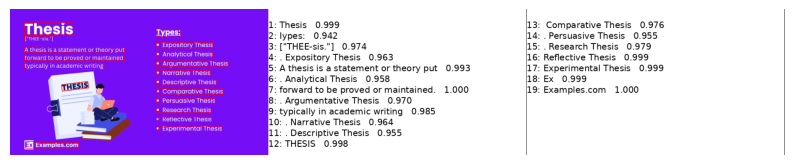

In [6]:
# 이미지 열기
image = Image.open(image_path).convert('RGB')

# 결과에서 박스, 텍스트, 점수 추출
boxes = [box for box, _ in result[0]]
txts = [text for _, (text, _) in result[0]]
scores = [confidence for _, (_, confidence) in result[0]]

# 폰트 파일 경로 지정
font_path = 'DejaVuSans.ttf'  # 이 파일이 같은 디렉토리에 있어야 함

# 시각화
drawn_image = draw_ocr(image, boxes, txts, scores, font_path=font_path)
plt.figure(figsize=(10, 10))
plt.imshow(drawn_image)
plt.axis('off')
plt.show()


In [8]:
# output format
pprint.pprint(result)

[[[[[67.0, 63.0], [293.0, 63.0], [293.0, 119.0], [67.0, 119.0]],
   ('Thesis', 0.9987366795539856)],
  [[[677.0, 92.0], [794.0, 95.0], [793.0, 131.0], [676.0, 128.0]],
   ('Iypes:', 0.9415797591209412)],
  [[[67.0, 125.0], [201.0, 125.0], [201.0, 150.0], [67.0, 150.0]],
   ('["THEE-sis."]', 0.9735413193702698)],
  [[[680.0, 155.0], [942.0, 155.0], [942.0, 180.0], [680.0, 180.0]],
   ('. Expository Thesis', 0.9625885486602783)],
  [[[66.0, 176.0], [533.0, 179.0], [532.0, 204.0], [66.0, 201.0]],
   ('A thesis is a statement or theory put', 0.9925677180290222)],
  [[[681.0, 197.0], [941.0, 197.0], [941.0, 223.0], [681.0, 223.0]],
   ('. Analytical Thesis', 0.9577645659446716)],
  [[[67.0, 215.0], [530.0, 215.0], [530.0, 239.0], [67.0, 239.0]],
   ('forward to be proved or maintained.', 0.9995056390762329)],
  [[[680.0, 239.0], [1013.0, 241.0], [1012.0, 267.0], [680.0, 266.0]],
   ('. Argumentative Thesis', 0.9703189730644226)],
  [[[67.0, 251.0], [436.0, 251.0], [436.0, 279.0], [67.0, 279